In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.decomposition import PCA
try:
  import geopandas as gpd
except:
  !pip install geopandas
  import geopandas as gpd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
root_path = "drive/MyDrive/ML_project"
#root_path = "drive/Sharedwithme/ML_project"
orig = root_path + "/bases_originales"
clean = root_path + "/bases limpias"
GIS = orig + "/GIS"
os.listdir(orig)

['carac_viv.csv',
 'carac_soc.csv',
 'conjunto_de_datos_tb_sec_iii_endireh_2016.csv',
 'rel_pareja_1.csv',
 'rel_pareja_2.csv',
 'toma_dec.csv',
 'roles.csv',
 'TB_SEC_III.dbf',
 'GIS',
 'Documentación INEGI',
 'conjunto_de_datos_tb_sec_vii_2_endireh_2016.csv',
 'economico_mujer.csv',
 'confianza.csv',
 'rol_genero.csv']

In [ ]:
data_base = pd.read_pickle(clean + "/MASTER_ENDIREH2016_coded.pkl")

In [ ]:
data_base = data_base[data_base['p_indigena'].notnull()]
data_base['suffers_violence'] = (data_base['tot_violent'] > 0)
data_base['suffers_violence'] = data_base['suffers_violence'].astype(int)

In [ ]:
#data_base = data_base.astype(str)
target = data_base['suffers_violence']
features = data_base[['ESTRATO', 'PAREN', 'EDAD', 'P2_5', 'P2_6', 'leer_escribir', 'P2_9', 'P2_10', 
            'P2_11', 'ocup_simple_m', 'P2_16', 'num_per_hog', 'num_mujeres_hog', 'mujeres_adultas', 
            'mujeres_no_adultas', 'secundaria_terminada', 'prepa_terminada', 'licenciatura_terminada', 'leer', 
            'num_indigenas', 'num_trabajadoras', 'max_educativo', 'num_hombres_hog', 'hombres_adultos', 'hombres_no_adultos', 
            'h_secundaria_terminada', 'h_prepa_terminada', 'h_licenciatura_terminada', 'h_leer', 'h_num_indigenas', 'num_trabajadores', 
            'h_max_educativo', 'p_sec_terminada', 'p_prepa_terminada', 'p_licenciatura_terminada', 'p_indigena', 'p_trabaja', 
            'ocup_simple_h', 'dif_edad', 'P4AB_1', 'P4_1', 'ing_mens_m', 'P4_3', 'ing_mens_h', 'P4_8_1', 'P4_8_2', 'P4_8_3', 'P4_8_4', 
            'P4_8_5', 'P4_8_6', 'P4_8_7', 'P4_8_8', 'P4_11', 'P1_2', 'P1_2_A', 'P1_3', 'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5', 
            'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'num_per_viv', 'P1_8', 'P15_1_1', 'P15_1_2', 'P15_1_3', 'P15_1_4', 'P15_1_5', 'P15_1_6', 
            'P15_1_7', 'P15_1_8', 'P15_1_9', 'P16_1_1', 'P16_1_2', 'P16_1_3', 'P16_1_4', 'P16_1_5', 'P16_1_6', 'P16_2_1', 'P16_2_2', 'P16_2_3', 
            'P16_2_4', 'P16_2_5', 'P16_2_6', 'asset_1_0.0', 'asset_1_1.0', 'asset_1_2.0', 'asset_1_3.0', 'asset_2_0.0', 'asset_2_1.0','asset_2_2.0',
            'asset_2_3.0','asset_3_0.0','asset_3_1.0', 'asset_3_2.0','asset_3_3.0','asset_4_0.0', 'asset_4_1.0','asset_4_2.0','asset_4_3.0',
            'asset_5_0.0','asset_5_1.0','asset_5_2.0','asset_5_3.0','asset_6_0.0','asset_6_1.0','asset_6_2.0','asset_6_3.0','asset_7_0.0',
            'asset_7_1.0','asset_7_2.0','asset_7_3.0','P1_1_1','P1_1_2','P1_1_3','P1_5_1','P1_5_2','P1_5_3','P1_5_4','P1_5_5','P1_5_6','P1_6_1',
            'P1_6_2','P1_6_3','P1_6_4','P1_6_5','P17_1_1_1_1','P17_1_1_1_10','P17_1_1_1_11','P17_1_1_1_12','P17_1_1_1_13','P17_1_1_1_14',
            'P17_1_1_1_15','P17_1_1_1_2','P17_1_1_1_3','P17_1_1_1_4','P17_1_1_1_5','P17_1_1_1_6','P17_1_1_1_7','P17_1_1_1_8','P17_1_1_1_9',
            'P17_1_2_1_1','P17_1_2_1_10','P17_1_2_1_11','P17_1_2_1_12','P17_1_2_1_13','P17_1_2_1_14','P17_1_2_1_15','P17_1_2_1_2','P17_1_2_1_3',
            'P17_1_2_1_4','P17_1_2_1_5','P17_1_2_1_6','P17_1_2_1_7','P17_1_2_1_8', 'P17_1_2_1_9', 'P17_1_3_1_1','P17_1_3_1_10','P17_1_3_1_11',
            'P17_1_3_1_12','P17_1_3_1_13', 'P17_1_3_1_14', 'P17_1_3_1_15','P17_1_3_1_2', 'P17_1_3_1_3','P17_1_3_1_4','P17_1_3_1_5','P17_1_3_1_6',
            'P17_1_3_1_7','P17_1_3_1_8', 'P17_1_3_1_9', 'P17_1_4_1_1', 'P17_1_4_1_10', 'P17_1_4_1_11','P17_1_4_1_12', 'P17_1_4_1_13','P17_1_4_1_14',
            'P17_1_4_1_15', 'P17_1_4_1_2', 'P17_1_4_1_3','P17_1_4_1_4','P17_1_4_1_5','P17_1_4_1_6','P17_1_4_1_7', 'P17_1_4_1_8','P17_1_4_1_9',
            'P17_1_5_1_1','P17_1_5_1_10', 'P17_1_5_1_11', 'P17_1_5_1_12', 'P17_1_5_1_13', 'P17_1_5_1_14', 'P17_1_5_1_15', 'P17_1_5_1_2','P17_1_5_1_3',
            'P17_1_5_1_4', 'P17_1_5_1_5', 'P17_1_5_1_6', 'P17_1_5_1_7', 'P17_1_5_1_8', 'P17_1_5_1_9','P17_1_6_1_1','P17_1_6_1_10','P17_1_6_1_11',
            'P17_1_6_1_12','P17_1_6_1_13', 'P17_1_6_1_14', 'P17_1_6_1_15', 'P17_1_6_1_2','P17_1_6_1_3', 'P17_1_6_1_4', 'P17_1_6_1_5','P17_1_6_1_6',
            'P17_1_6_1_7', 'P17_1_6_1_8','P17_1_6_1_9','P17_1_7_1_1','P17_1_7_1_10', 'P17_1_7_1_11','P17_1_7_1_12','P17_1_7_1_13','P17_1_7_1_14',
            'P17_1_7_1_15', 'P17_1_7_1_2', 'P17_1_7_1_3', 'P17_1_7_1_4','P17_1_7_1_5','P17_1_7_1_6','P17_1_7_1_7','P17_1_7_1_8','P17_1_7_1_9','P4_6_AB_0.0',
            'P4_6_AB_1.0','P4_6_AB_3.0','P16_3_1_1_1','P16_3_1_1_2','P16_3_1_1_3','P16_3_1_1_4','P16_3_1_1_5','P16_3_1_1_6','P16_3_2_1_1','P16_3_2_1_2',
            'P16_3_2_1_3','P16_3_2_1_4','P16_3_2_1_5','P16_3_2_1_6', 'P16_3_3_1_1','P16_3_3_1_2','P16_3_3_1_3','P16_3_3_1_4','P16_3_3_1_5','P16_3_3_1_6',
            'P16_3_4_1_1','P16_3_4_1_2','P16_3_4_1_3','P16_3_4_1_4','P16_3_4_1_5','P16_3_4_1_6','P16_3_5_1_1','P16_3_5_1_2','P16_3_5_1_3','P16_3_5_1_4',
            'P16_3_5_1_5','P16_3_5_1_6','P16_3_6_1_1','P16_3_6_1_2','P16_3_6_1_3','P16_3_6_1_4','P16_3_6_1_5', 'P16_3_6_1_6']]

 

In [ ]:
labels = ['ESTRATO', 'PAREN', 'EDAD', 'P2_5', 'P2_6', 'leer_escribir', 'P2_9', 'P2_10', 
            'P2_11', 'ocup_simple_m', 'P2_16', 'num_per_hog', 'num_mujeres_hog', 'mujeres_adultas', 
            'mujeres_no_adultas', 'secundaria_terminada', 'prepa_terminada', 'licenciatura_terminada', 'leer', 
            'num_indigenas', 'num_trabajadoras', 'max_educativo', 'num_hombres_hog', 'hombres_adultos', 'hombres_no_adultos', 
            'h_secundaria_terminada', 'h_prepa_terminada', 'h_licenciatura_terminada', 'h_leer', 'h_num_indigenas', 'num_trabajadores', 
            'h_max_educativo', 'p_sec_terminada', 'p_prepa_terminada', 'p_licenciatura_terminada', 'p_indigena', 'p_trabaja', 
            'ocup_simple_h', 'dif_edad', 'P4AB_1', 'P4_1', 'ing_mens_m', 'P4_3', 'ing_mens_h', 'P4_8_1', 'P4_8_2', 'P4_8_3', 'P4_8_4', 
            'P4_8_5', 'P4_8_6', 'P4_8_7', 'P4_8_8', 'P4_11', 'P1_2', 'P1_2_A', 'P1_3', 'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5', 
            'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'num_per_viv', 'P1_8', 'P15_1_1', 'P15_1_2', 'P15_1_3', 'P15_1_4', 'P15_1_5', 'P15_1_6', 
            'P15_1_7', 'P15_1_8', 'P15_1_9', 'P16_1_1', 'P16_1_2', 'P16_1_3', 'P16_1_4', 'P16_1_5', 'P16_1_6', 'P16_2_1', 'P16_2_2', 'P16_2_3', 
            'P16_2_4', 'P16_2_5', 'P16_2_6', 'asset_1_0.0', 'asset_1_1.0', 'asset_1_2.0', 'asset_1_3.0', 'asset_2_0.0', 'asset_2_1.0','asset_2_2.0',
            'asset_2_3.0','asset_3_0.0','asset_3_1.0', 'asset_3_2.0','asset_3_3.0','asset_4_0.0', 'asset_4_1.0','asset_4_2.0','asset_4_3.0',
            'asset_5_0.0','asset_5_1.0','asset_5_2.0','asset_5_3.0','asset_6_0.0','asset_6_1.0','asset_6_2.0','asset_6_3.0','asset_7_0.0',
            'asset_7_1.0','asset_7_2.0','asset_7_3.0','P1_1_1','P1_1_2','P1_1_3','P1_5_1','P1_5_2','P1_5_3','P1_5_4','P1_5_5','P1_5_6','P1_6_1',
            'P1_6_2','P1_6_3','P1_6_4','P1_6_5','P17_1_1_1_1','P17_1_1_1_10','P17_1_1_1_11','P17_1_1_1_12','P17_1_1_1_13','P17_1_1_1_14',
            'P17_1_1_1_15','P17_1_1_1_2','P17_1_1_1_3','P17_1_1_1_4','P17_1_1_1_5','P17_1_1_1_6','P17_1_1_1_7','P17_1_1_1_8','P17_1_1_1_9',
            'P17_1_2_1_1','P17_1_2_1_10','P17_1_2_1_11','P17_1_2_1_12','P17_1_2_1_13','P17_1_2_1_14','P17_1_2_1_15','P17_1_2_1_2','P17_1_2_1_3',
            'P17_1_2_1_4','P17_1_2_1_5','P17_1_2_1_6','P17_1_2_1_7','P17_1_2_1_8', 'P17_1_2_1_9', 'P17_1_3_1_1','P17_1_3_1_10','P17_1_3_1_11',
            'P17_1_3_1_12','P17_1_3_1_13', 'P17_1_3_1_14', 'P17_1_3_1_15','P17_1_3_1_2', 'P17_1_3_1_3','P17_1_3_1_4','P17_1_3_1_5','P17_1_3_1_6',
            'P17_1_3_1_7','P17_1_3_1_8', 'P17_1_3_1_9', 'P17_1_4_1_1', 'P17_1_4_1_10', 'P17_1_4_1_11','P17_1_4_1_12', 'P17_1_4_1_13','P17_1_4_1_14',
            'P17_1_4_1_15', 'P17_1_4_1_2', 'P17_1_4_1_3','P17_1_4_1_4','P17_1_4_1_5','P17_1_4_1_6','P17_1_4_1_7', 'P17_1_4_1_8','P17_1_4_1_9',
            'P17_1_5_1_1','P17_1_5_1_10', 'P17_1_5_1_11', 'P17_1_5_1_12', 'P17_1_5_1_13', 'P17_1_5_1_14', 'P17_1_5_1_15', 'P17_1_5_1_2','P17_1_5_1_3',
            'P17_1_5_1_4', 'P17_1_5_1_5', 'P17_1_5_1_6', 'P17_1_5_1_7', 'P17_1_5_1_8', 'P17_1_5_1_9','P17_1_6_1_1','P17_1_6_1_10','P17_1_6_1_11',
            'P17_1_6_1_12','P17_1_6_1_13', 'P17_1_6_1_14', 'P17_1_6_1_15', 'P17_1_6_1_2','P17_1_6_1_3', 'P17_1_6_1_4', 'P17_1_6_1_5','P17_1_6_1_6',
            'P17_1_6_1_7', 'P17_1_6_1_8','P17_1_6_1_9','P17_1_7_1_1','P17_1_7_1_10', 'P17_1_7_1_11','P17_1_7_1_12','P17_1_7_1_13','P17_1_7_1_14',
            'P17_1_7_1_15', 'P17_1_7_1_2', 'P17_1_7_1_3', 'P17_1_7_1_4','P17_1_7_1_5','P17_1_7_1_6','P17_1_7_1_7','P17_1_7_1_8','P17_1_7_1_9','P4_6_AB_0.0',
            'P4_6_AB_1.0','P4_6_AB_3.0','P16_3_1_1_1','P16_3_1_1_2','P16_3_1_1_3','P16_3_1_1_4','P16_3_1_1_5','P16_3_1_1_6','P16_3_2_1_1','P16_3_2_1_2',
            'P16_3_2_1_3','P16_3_2_1_4','P16_3_2_1_5','P16_3_2_1_6', 'P16_3_3_1_1','P16_3_3_1_2','P16_3_3_1_3','P16_3_3_1_4','P16_3_3_1_5','P16_3_3_1_6',
            'P16_3_4_1_1','P16_3_4_1_2','P16_3_4_1_3','P16_3_4_1_4','P16_3_4_1_5','P16_3_4_1_6','P16_3_5_1_1','P16_3_5_1_2','P16_3_5_1_3','P16_3_5_1_4',
            'P16_3_5_1_5','P16_3_5_1_6','P16_3_6_1_1','P16_3_6_1_2','P16_3_6_1_3','P16_3_6_1_4','P16_3_6_1_5', 'P16_3_6_1_6']


In [1]:
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#Normalize edad


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.20, 
                                                    random_state=0) 

hyperparameters =  {'criterion': ['gini', 'entropy'], 'max_depth':[10, 20, 30], 'min_samples_split':[500, 1000]}

grid_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=hyperparameters,
             cv=10,
             return_train_score=True,
             scoring=['accuracy', 'recall', 'precision'],
             refit='accuracy')

#Fitting the model
grid_tree.fit(X_train, y_train)
tree_model_y_hat = grid_tree.predict(X_test)

#Results
model_results = pd.DataFrame(grid_tree.cv_results_)
ranked_model = model_results.sort_values(by=['rank_test_accuracy'])
ranked_model[['param_criterion', 'param_max_depth', 'param_min_samples_split',
              'mean_test_recall', 'mean_test_accuracy']]



NameError: ignored

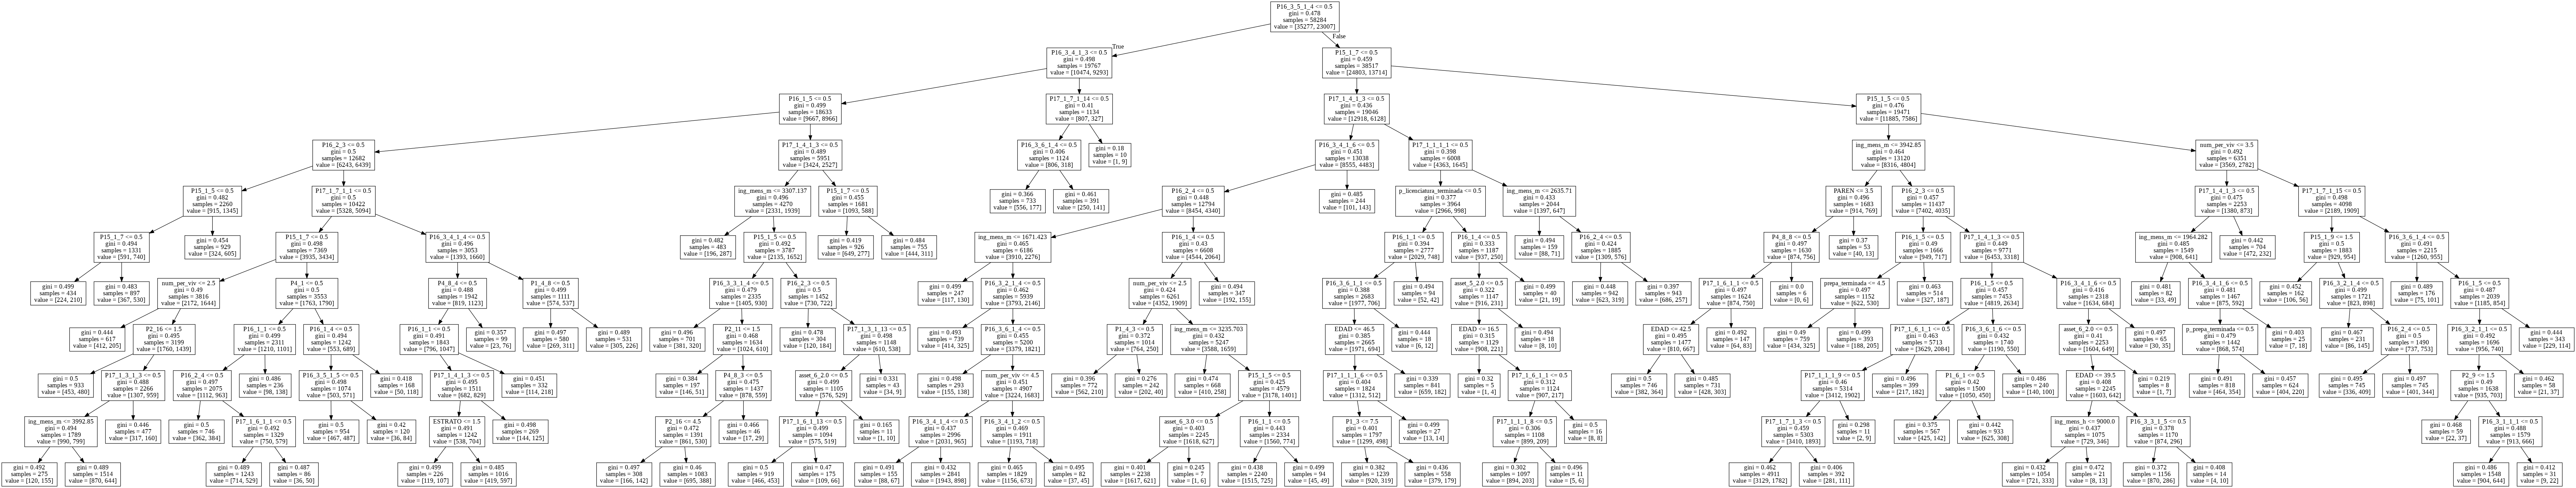

In [ ]:
#!pip install pydotplus
#!pip install graphviz

from sklearn import tree
import pydotplus
from IPython.display import Image
import graphviz
from graphviz import Source
from sklearn import tree

graph = Source(tree.export_graphviz(grid_tree.best_estimator_, out_file=None, feature_names=labels))
graph.format = 'png'
graph.render('dtree_render',view=True)
Image("dtree_render.png")

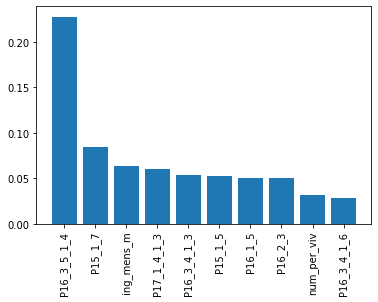

In [ ]:
# Get feature importances
importances = grid_tree.best_estimator_.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [labels[i] for i in indices]

# Plot
plt.figure()
plt.bar(range(features[names[:10]].shape[1]),importances[indices[:10]])
plt.xticks(range(features[names[:10]].shape[1]), names[:10], rotation=90)
plt.show()

In [ ]:
#PCA MODEL
features_pca = features

def normalize_cols(dataframe, cols):

  for col in cols:
    dataframe[col] = (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()

cols_to_normalize = ['P1_2', 'P1_3', 'EDAD', 'ing_mens_h', 'ing_mens_m', 'num_per_hog','num_mujeres_hog', 'mujeres_adultas', 'mujeres_no_adultas', 'num_indigenas', 
           'num_trabajadoras', 'num_hombres_hog', 'hombres_adultos', 'hombres_no_adultos', 'h_num_indigenas', 'num_trabajadores', 'dif_edad', 'ing_mens_m', 'ing_mens_h', 
           'num_per_viv']


normalize_cols(features_pca, cols_to_normalize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


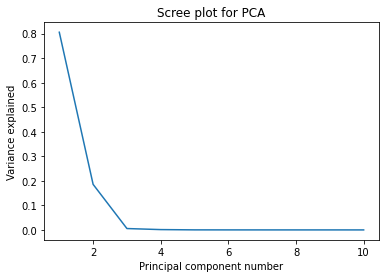

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

def scree_plot(pca_obj):
    """
    Create scree plot for PCA. 
    :param pca_obj: sklearn.decomposition.PCA object
    :return:
    """
    sns.lineplot(x=range(1, pca_obj.n_components+1), y=pca_obj.explained_variance_ratio_)
    plt.xlabel("Principal component number")
    plt.ylabel("Variance explained")
    plt.title("Scree plot for PCA")

#pca = PCA(n_components = 40)
pca = PCA(n_components = 10, svd_solver='full')
principalComponents = pca.fit(features_pca.T)
scree_plot(pca)

In [ ]:
main_components = pca.components_

def corr_matrix(features, pca_components):
  cols = ["PCA_VECTOR_" + str(i+1) for i in range(len(pca_components))]
  results = pd.DataFrame(columns=cols)
  
  for i in features:
        variable = features.loc[:, i].values
        row = []
        for pc_vector in pca_components:
            row.append(np.corrcoef(pc_vector, variable)[0][1])
        serie = pd.Series(row, index = results.columns)
        results = results.append(serie, ignore_index=True)
        
  names = pd.DataFrame({'names_features': labels})
  results = pd.concat([results, names], axis=1)
  results.set_index('names_features', inplace=True)
  return results

pca_matrix = corr_matrix(features_pca, main_components)
ordered = pca_matrix[pca_matrix > 0.5]
ordered = ordered[ordered.PCA_VECTOR_1.notnull() | ordered.PCA_VECTOR_2.notnull()]
ordered.sort_values(by = 'PCA_VECTOR_1')

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,PCA_VECTOR_1,PCA_VECTOR_2,PCA_VECTOR_3,PCA_VECTOR_4,PCA_VECTOR_5,PCA_VECTOR_6,PCA_VECTOR_7,PCA_VECTOR_8,PCA_VECTOR_9,PCA_VECTOR_10
names_features,,,,,,,,,,
P2_6,0.809404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P2_5,0.827025,NaN,0.537049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAREN,NaN,0.608301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_sec_terminada,NaN,0.998932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_prepa_terminada,NaN,0.998931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_licenciatura_terminada,NaN,0.998944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_indigena,NaN,0.998866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_trabaja,NaN,0.998933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Sample for clustering
features_target = pd.concat([features, target], axis=1)
sample_target = features_target.sample(frac=0.15, replace=True, random_state=1)
sample = sample_target[:]
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
sample.drop(columns='suffers_violence', inplace= True)
clustering = DBSCAN(eps=0.1, min_samples=1000).fit(sample.values)
y_pred_clustering = clustering.fit_predict(sample[['P2_6', 'P2_5', 'PAREN']])
sample_target['label'] = y_pred_clustering
sample_target = sample_target[sample_target['label'] != -1]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Prevalence of DBSCAN Clustering

proportions = pd.DataFrame()
proportions['CERO'] = sample_target[sample_target['suffers_violence']== 0 ]['label'].value_counts()/len(sample_target[sample_target['suffers_violence']== 0 ])
proportions['ONE'] = sample_target[sample_target['suffers_violence']== 1 ]['label'].value_counts()/len(sample_target[sample_target['suffers_violence']== 1 ])
proportions

,CERO,ONE
0,0.545176,0.553398
1,0.264147,0.246966
2,0.190677,0.199636


In [ ]:
import plotly.express as px

proportions = pd.DataFrame()
proportions['CERO'] = sample_target[sample_target['suffers_violence']== 0 ]['label'].value_counts()/len(sample)
proportions['ONE'] = sample_target[sample_target['suffers_violence']== 1 ]['label'].value_counts()/len(sample)

# multiple unpivot columns
proportions.melt(proportions, id_vars =['CERO', 'ONE'])

fig = px.bar(proportions.set_index(['CERO', 'ONE']), title="Prevalence")
fig.show()